## Шаг №1. Знакомство с данными

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from scipy import stats as st

In [6]:
df = pd.read_csv('games.csv')

Вызовем таблицу и ознакомимся с выгрузкой

In [7]:
df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Сразу бросается в глаза, что названия колонок с большой буквы, и поскольку это неудобно для анализа, то вы все сведем к нижнему регистру. Год выпуска игр в дробном формате, что тажке требует обработки.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Пропуски в данных у нас есть, необходимо будет определить природу их возникновения. Посмотрим еще на количество дубликатов в Датафрейме.

In [9]:
df.duplicated().sum()

0

### Вывод:

В ходе знакомства с данными удалось обнаружить пропуски в столбцах таблицы, природу которых мы определим в следующем пункте. Сразу для удобства приведем названия столбцов к нижнему регистру. Сразу в глаза бросился дробный формат даты выпуска игр. Дубликатов не обнаружено. 

## Шаг № 2. Предобработка данных

Сразу начнем с замены названия

In [10]:
df.columns = [col.lower() for col in df.columns]

Попытаемся определить природу пропусков и найти какую-то закономерность для дальнейшего анализа и решения задачи.

In [11]:
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Пропусков достаточно много получилось в разделе Оценок и Рейтинга. Теперь посмотрим на них через колонку Пользовательской оценки.

In [12]:
df[df['critic_score'].isnull() == True]


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Сразу можно сделать вывод по поводу пропусков о **дате релиза** - их меньше 10% и по-большому счету их можно даже удалить. Заменить чем-либо смысла нет, так как дата выпуска это такой параметр, который очень индивидуален и его глупо менять по средним, медианам или сгрупировав по общему признаку и определив всю ту же средню или медиану.

In [13]:
df.dropna(subset = ['year_of_release', 'name'], inplace = True)



Что касается самых массивных колонок с пропусками - **critic_score, user_score, rating**, то они по таблице выше пересекаются между собой, что говорит нам о неслучайном возникновении. Скорее всего, тут или какая-то общая ошибка при выгрузке из открытых источников, или просто не удалось получить эти даннные. Считаю, что глупо будет их также менять какими-то средними показателями или медианой. Все же, тут пропуски в оценке пользователей, и если мы попытаемся их как-то заменить, то дальнейший Анализ не будет иметь смысла. 

В итоге, логичней будет на месте пропусков указать - 0. 


In [14]:
for columns in ['name', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']:
    df[columns] = df[columns].fillna(0)

Теперь проверим, все ли действительно заменилось

In [15]:
df.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

Теперь посмотрим на значение TBD в колонке **user_score** и попытаемся его обработать.

In [16]:
df['user_score'].value_counts()

0      6605
tbd    2376
7.8     322
8       285
8.2     276
       ... 
2.3       2
0.5       2
0.9       2
0         1
9.7       1
Name: user_score, Length: 97, dtype: int64

Как мы видим, значений tbd очень много. В свою очередь, этот параметр TBD означает - To Be Determined, то есть "Будет определено". Получается, что у нас тут тоже информация, которая пока неизвестна по определенным причинам. Считаю логичным, если мы здесь tbd заменим на 0. 

In [17]:
df['user_score'] = df['user_score'].replace('tbd', 0)

Посмотрим что получилось в итоге с заменой.

In [18]:
df['user_score'].value_counts()

0      8981
7.8     322
8       285
8.2     276
8.3     252
       ... 
2.3       2
0.5       2
0.9       2
9.7       1
0         1
Name: user_score, Length: 96, dtype: int64

Как я уже и говорил выше, переведем **year_of_release** в человеческий формат.Еще такое же действие совершим с колонкой user_score, поскольку удобнее перевести ее в дробный тип.

In [19]:
df['year_of_release'] = df['year_of_release'].astype(int)
df['user_score'] = df['user_score'].astype(float)

Проверим что у нас получилось

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.4+ MB


Теперь посмотрим на суммарную выручку с продаж игр по всему Миру.

In [21]:
df['total_income'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

Посмотрим сколько получилось в итоге

In [22]:
df.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_income
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0.0,0.0,0,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0.0,0.0,0,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,0.0,0.0,0,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,0.0,0.0,0,28.31


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
 11  total_income     16444 non-null  float64
dtypes: float64(7), int32(1), object(4)
memory usage: 1.6+ MB


### Вывод:

В ходе предобработки данных мы выяснили, что наличие пропусков предположительно имеет неслучайный характер. Замена на какие-то количественные значения не имеет смысла + это может серьезно сказаться на задачах бизнеса. Поскольку данные для анализа были собраны из открых источников, то есть предположение, что все что оказалось в пропусках, просто не удалось найти. Заменили все подобные пропуски на 0 и продолжили Анализ дальше.

## Шаг №3. Исследователский анализ данных

Попытаемся прикинуть сколько игр выпускалось в различный период + ради любопытства посмотрим на итоговую прибыль по продажам за каждый год.

In [24]:
df.pivot_table(index = 'year_of_release', values = 'total_income', aggfunc = [len, sum]).reset_index()

,year_of_release,len,sum
,,total_income,total_income
0,1980,9.0,11.38
1,1981,46.0,35.68
2,1982,36.0,28.88
3,1983,17.0,16.80
4,1984,14.0,50.35
5,1985,14.0,53.95
6,1986,21.0,37.08
7,1987,16.0,21.70
8,1988,15.0,47.21


Как мне кажется, что игры с 1980 по 1999 год включительно стоит не учитывать. Во-первых, там игр само по себе выходило очень мало, и они были настолько другие, что сейчас вряд ли стоит опираться на эти данные. Во-вторых, ориентироваться на принцип успешности игр более чем 20-летней давности будет нецелесообразно, учитывая, как быстро развивается индустрия. Чтобы результат был очевиден построим Линейный график производства игр по годам.

In [25]:
df = df.query('year_of_release > 2000')

[Text(0, 0.5, 'Количество игр'), Text(0.5, 0, 'Год релиза')]

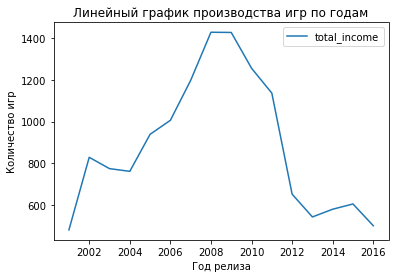

In [26]:
df.pivot_table(index = 'year_of_release', values = 'total_income', aggfunc = len).plot(title='Линейный график производства игр по годам').set(xlabel="Год релиза", ylabel="Количество игр")

Ради любопытства давайте посмотрим на доходность по годам

[Text(0, 0.5, 'Суммарная прибыль'), Text(0.5, 0, 'Год релиза игры')]

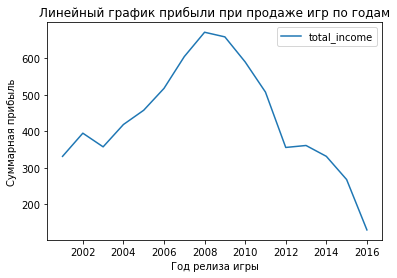

In [27]:
df.pivot_table(index = 'year_of_release', values = 'total_income', aggfunc = sum).plot(title='Линейный график прибыли при продаже игр по годам').set(xlabel="Год релиза игры", ylabel="Суммарная прибыль")


Как мы видим по граффикам, они примерно похожи друг на друга и изменялись пропорционально. Яркого всплеска прибыли при малом количестве релизов не было. С 2010 мы видим постепенное сокращение производства игр. По графикам можно сделать вывод, что в среднем одна игра приносит 0.5 Млн Долларов. Если Игр проиозвели 1400, то суммарные продажи на 700 млн и тд. Этой логике не следуют 2015 и 2016 годы. В тот период заработали явно меньше.

Для более точного определения актуальных данных посмотрим на наиболее прибыльные платформы.

In [28]:
df.pivot_table(index = 'platform', values = 'total_income', aggfunc = sum).reset_index().sort_values(by = 'total_income', ascending = False)

,platform,total_income
9,PS2,1194.39
17,X360,961.24
10,PS3,931.34
15,Wii,891.18
2,DS,802.76
11,PS4,314.14
4,GBA,312.81
12,PSP,289.53
0,3DS,257.81
18,XB,250.58


Самыми прибыльными платформами являются - **PS2, X360, PS3, Wii, DS, PS4**

Попробуем построить распределение по годам и перед этим создадим срез только по самым популярным платформам.

In [29]:
top_platform = df.query('platform == ["PS2", "X360", "PS3", "Wii", "DS", "PS4"]')

А теперь посмотрим на Линейный граффик популярности платформ в зависимости от Года

[Text(0, 0.5, 'Доход платформы'), Text(0.5, 0, 'Год релиза игры')]

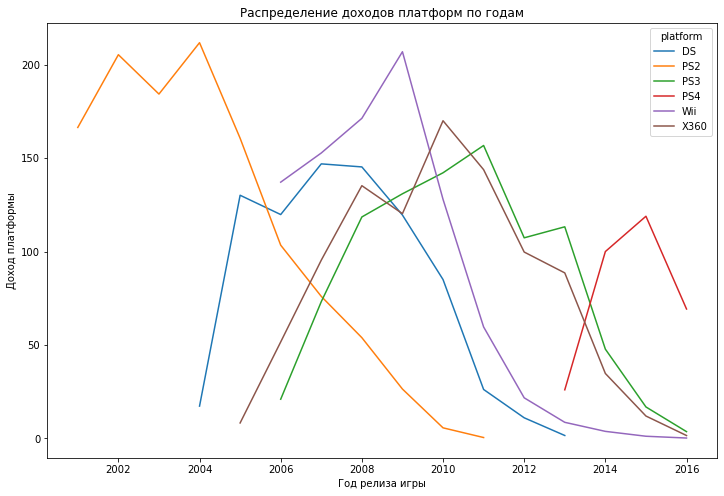

In [34]:
top_platform.pivot_table(index=['year_of_release'], columns='platform', values = 'total_income', aggfunc = 'sum').plot(title='Распределение доходов платформ по годам', figsize = (12,8)).set(xlabel="Год релиза игры", ylabel="Доход платформы")

По графику можем сделать вывод, что ориентироваться на платформу PS2 уже не стоит, даже несмотря на ее прибыль. Период ее активности был до 2011 года. Считаю, что DS тоже уже неактуальна и скончалась в 2013. 

Можно заметить, что среднее времея жизни платформы - **10 лет**. Примерно через **5 лет** она достигает по продажам своего пика и дальше приносит все меньше и меньше.

Сопоставив все полученные данные мы теперь можем сделать вывод, что актуальным периодом является с 2011 по 2016 годы. На основе этих данных уместно делать какие-то умозаключения перед 2017 годом. Данные до 2011 года, считаю необъективными и устаревшими.

In [31]:
act_df = df.query('year_of_release >= 2011')

Теперь посмотрим на самые прибыльные платформы за актуальный период.

In [32]:
act_df.pivot_table(index = 'platform', values = 'total_income', aggfunc = sum).reset_index().sort_values(by = 'total_income', ascending = False)

,platform,total_income
4,PS3,445.57
10,X360,380.38
5,PS4,314.14
0,3DS,257.81
11,XOne,159.32
2,PC,97.68
8,Wii,95.02
9,WiiU,82.19
7,PSV,53.81
1,DS,38.73


Но не будем делать конечные выводы, посколько в данных могут быть платформы уже на пике своей популярности, а могут и потенциально перспективные. Посмотрим на потенциал платформ за актуальный период. 


[Text(0, 0.5, 'Доход платформы'), Text(0.5, 0, 'Год релиза игры')]

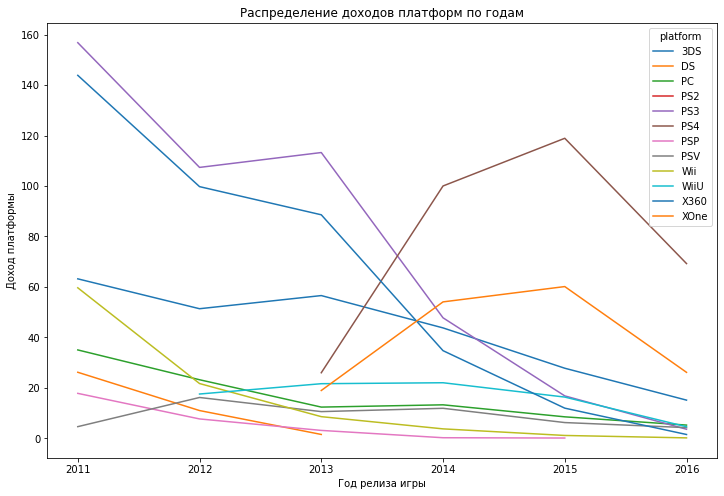

In [33]:
act_df.pivot_table(index=['year_of_release'], columns='platform', values = 'total_income', aggfunc = 'sum').plot(title='Распределение доходов платформ по годам', figsize = (12,8)).set(xlabel="Год релиза игры", ylabel="Доход платформы")

В моменте на графике видно, что по продажам лидировала платформа PS3. Однако, чем ближе она к 2017 году, тем стремительнее падают продажи. Примерно такая же ситуация с X360. На момент конца 2016 года продажи лучше всего идут у модной PS4 и XONE. Есть еще наблюдение, что новые платформы достигают своего пика за два года. Судя по графику, раньше жизненный цикл платформы был дольше. Ну и если говорить о прибыли, то в целом продажи игр стали приносить меньше. 

На мой взгляд к перспективным платформам можем отнести: PS4, XONE, PC, X360, PS3.  Первые две появились не так давно и в 2016 они самые прибыльные. PC приносит не сильно много, но эта платформа стабильна и имеет длинных жизненный цикл. X360 и PS3 были самыми прибыльными, но даже падая они собирают продаж больше, чем некоторые молодые платформы.


In [35]:
top5 = act_df.query('platform == ["PS4", "X360", "XOne", "PC", "PS3"]')

Посмотрим на график распределения игр с учетом выбросов, чтобы понять где мы их уберем


Text(0.5, 1.0, 'График распределения игр на перспективных платформах')

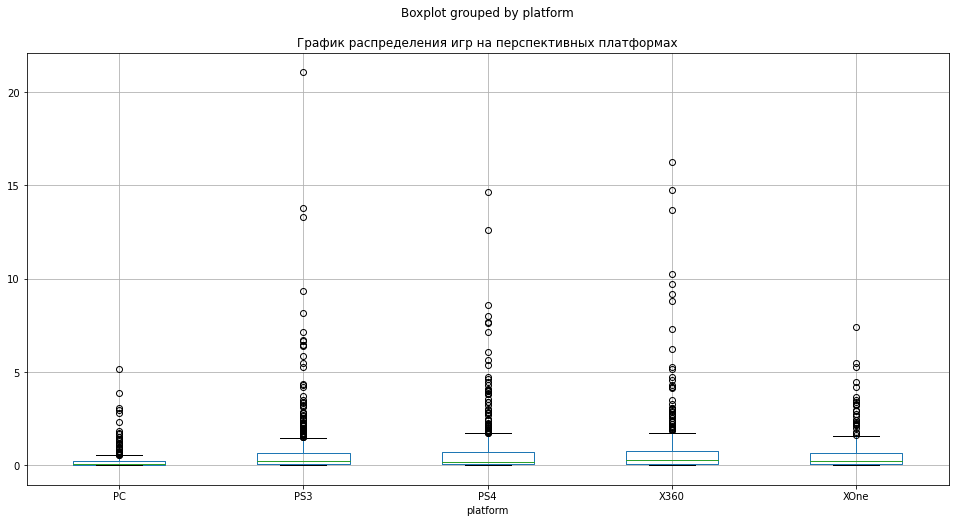

In [36]:
top5.boxplot('total_income', 'platform', figsize = (16,8),grid=True).set_title('График распределения игр на перспективных платформах')

Выбросы начинаются примерно от 1.5 млн. и от них необходимо избавиться

In [37]:
without_trash = top5.query('total_income < 1.5')

Теперь посмотрим на график без выбросов

Text(0.5, 1.0, 'График распределения игр на перспективных платформах')

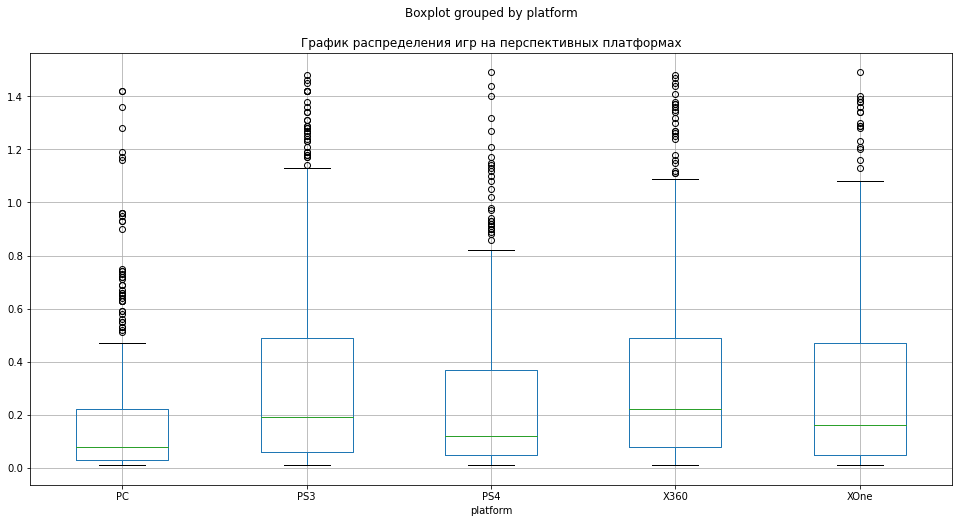

In [38]:
without_trash.boxplot('total_income', 'platform', figsize = (16,8),grid=True).set_title('График распределения игр на перспективных платформах')

Судя по графику, X360 и PS3 имеют самые серьезные продажи среди платформ. Даже я бы сказал в PS3 распределение серьезный и хвост длиннее. Мы уже сделали вывод, что PS3 начало увядать, а значит продажи XOne скоро станут больше.

Теперь посмотрим зависимость дохода от пользовательской оценки и оценки критиков. Поскольку в колонках **critic_score и user_score** есть значения равные 0, то чтобы они не мешали анализу, сделаем выборку без них.

In [39]:
without_trash = without_trash[without_trash['critic_score'] != 0]

In [40]:
without_trash = without_trash[without_trash['user_score'] != 0]

Теперь когда данные подготовленны, выведем корреляцию между доходом и пользовательскими оценками + построим диаграмму рассеиния. 

In [41]:
without_trash['total_income'].corr(without_trash['user_score'])

0.11615055023700198

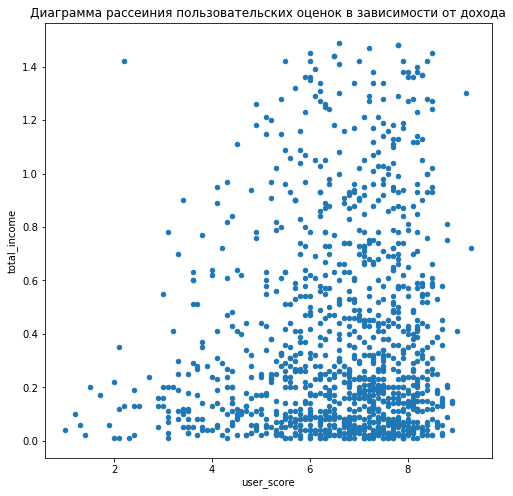

In [44]:
without_trash.plot(x='user_score', y='total_income', kind='scatter', title='Диаграмма рассеиния пользовательских оценок в зависимости от дохода', figsize = (8,8))

Корреляция и диаграмма рассеиния говорят, что зависимости фактически нет. Пользователи ставят в основном оценки от 6 до 10. Самое интересное, что встречаются моменты, когда игра принесла много денег, но пользователи ее оценили низко. Кто знает, может быть это случаность, а может и специальные хейт от конкурентов на различных платформах.

Теперь выведем корреляцию между доходом и оценками критиков + построим диаграмму рассеиния.

In [45]:
without_trash['total_income'].corr(without_trash['critic_score'])

0.34415461485125637

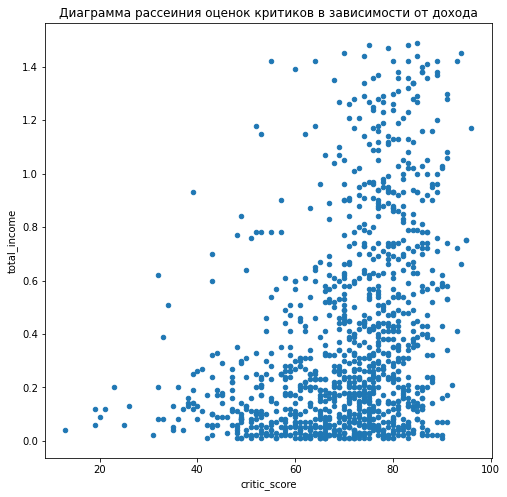

In [47]:
without_trash.plot(x='critic_score', y='total_income', kind='scatter', title='Диаграмма рассеиния оценок критиков в зависимости от дохода', figsize = (8,8))

В данном случае, зависимость есть несильная. По диаграмме видно, что в отличие от пользователей, критики дорогим играм ставят оценки достаточно высокие или выше среднего.

Теперь соотнесем выводы с продажами игра на других платформах.


In [48]:
anti_top = act_df.query('platform != ["PS4", "X360", "XOne", "PC", "PS3"]')

Посмотрим сперва на график с выбросами,чтобы понять как избавитсья от них

Text(0.5, 1.0, 'График распределения игр на остальных платформах')

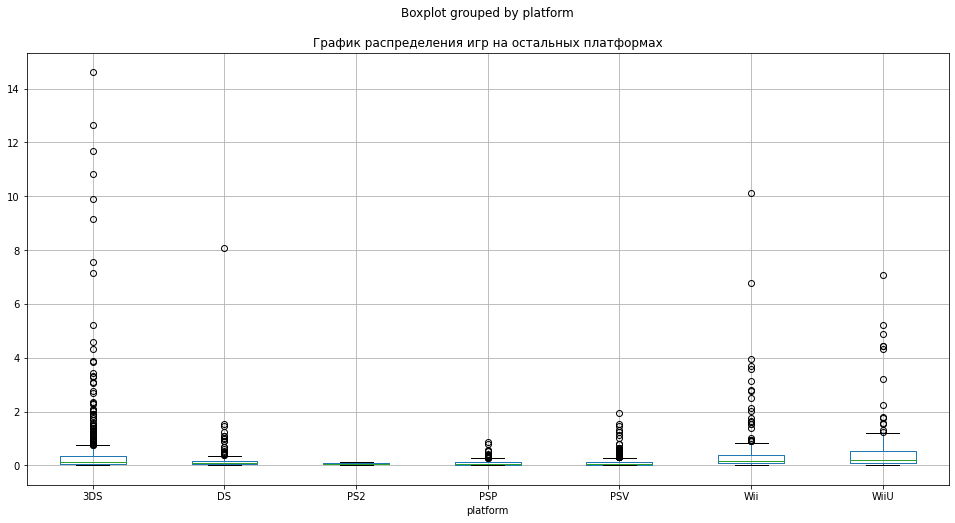

In [49]:
anti_top.boxplot('total_income', 'platform', figsize = (16,8),grid=True).set_title('График распределения игр на остальных платформах')

Поскольку не топовые платформы зарабатывали не так много, то здесь также отсечем выбросы за 1.5 млн.

In [50]:
anti_top_new = anti_top.query('total_income < 1.5')

Text(0.5, 1.0, 'График распределения игр на остальных платформах')

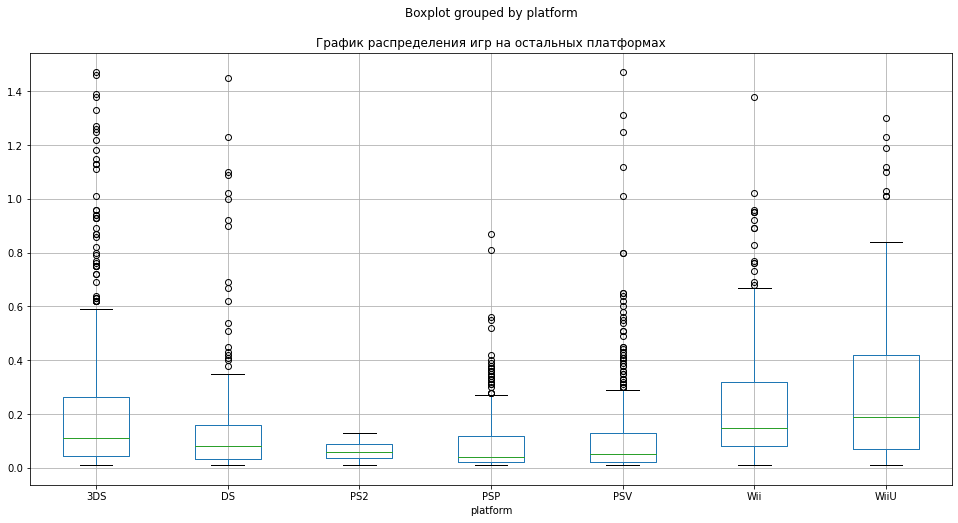

In [51]:
anti_top_new.boxplot('total_income', 'platform', figsize = (16,8),grid=True).set_title('График распределения игр на остальных платформах')

Стоит заметить, что здесь есть три  платформы Wii, 3DS и WiiU, которые могли бы составить конкуренцию нашей пятерке top5. Wii вообще имеет за своими плечами самую дорогую игру. Если не учитывать Wii, 3DS и WiiU то в остальном платформы были неприбыльными и не имели самородков в виде отдельных игр, которые бы выделялись своей прибылью.

Теперь посмотрим на распределение игр по жанрам.

[Text(0, 0.5, 'Доход платформы'), Text(0.5, 0, 'Год релиза игры')]

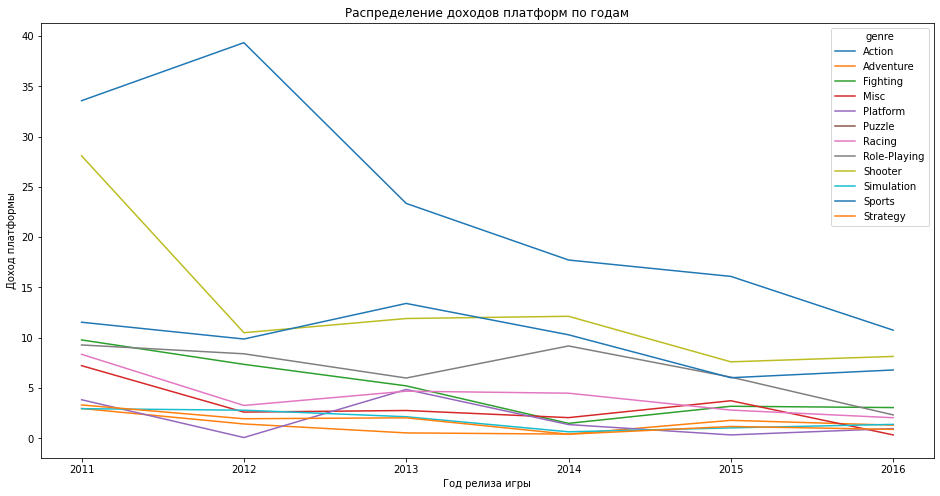

In [52]:
without_trash.pivot_table(index=['year_of_release'], columns='genre', values = 'total_income', aggfunc = 'sum').plot(title='Распределение доходов платформ по годам', figsize = (16,8)).set(xlabel="Год релиза игры", ylabel="Доход платформы")

Как мы и говорили раньше на основе цифр, самыми прибыльными жанрами были и остаются Action, Shooter and Sport. Другие жанры не имеют такого выраженного пика в продажах. Самое интересное, что когда у Action был спад, остальные жанры выстрелили в моменте. Скорее всего это было связано с неудачными релизами. 

Жанры с низкими продажами за 5 лет имеют фактически одинаковые показатели без роста прибыли. Вероятно, что такие игры имеют свою постоянную аудиторию. В последнее время у всех продажи шли на убыль кроме Шутеров.

### Вывод: 

Мы определили период бума компьютерных игр с 2011 по 2016 годы. Пик по продажам пришелся на период 2011-2013 годов, далее игровая индустрия стала меньше зарабатывать. Возможно из-за потери пользовательского интереса к играм или кризиса в самих играх.

В это время пришли на смену устарешвим платформам PS и PS2, новые игроки рынка - **X360, PS3, Wii, DS, PS, XOne**. Средний цикл жизни игровой платформы составляет 10 лет. Рассчитывать много заработать на платформах, которые на излете, я думаю, не стоит. 

Я считаю, что на оценки пользователей особо не стоит обращать внимание, поскольку они не гарантируют, что игра будет плохо продаваться или наоборот. С мнением критиков уже больше стоит считаться, но до конца ссылаться на их мнение я бы не стал.


## Шаг № 4. Составим портрет пользователя каждого региона

Для начала пройдемся по каждому региону отдельно и определим TOP5

In [53]:
top_na = act_df.pivot_table(index = 'platform', values = ['na_sales'], aggfunc = 'sum').sort_values(by = 'na_sales', ascending = False).reset_index()
top_eu = act_df.pivot_table(index = 'platform', values = ['eu_sales'], aggfunc = 'sum').sort_values(by = 'eu_sales', ascending = False).reset_index()
top_jp = act_df.pivot_table(index = 'platform', values = ['jp_sales'], aggfunc = 'sum').sort_values(by = 'jp_sales', ascending = False).reset_index()


Теперь посмотрим на суммарные значение TOP5 платформ по региону NA

In [54]:
top_na.head(5)

,platform,na_sales
0,X360,226.80
1,PS3,168.26
2,PS4,108.74
3,XOne,93.12
4,3DS,82.65


TOP5 Платформ Европейского рынка в цифрах


In [55]:
top_eu.head(5)

,platform,eu_sales
0,PS3,163.10
1,PS4,141.09
2,X360,117.10
3,3DS,61.27
4,PC,56.70


Ну и посмотрим на Японию

In [56]:
top_jp.head(5)

,platform,jp_sales
0,3DS,100.62
1,PS3,49.39
2,PSP,24.04
3,PSV,21.84
4,PS4,15.96


In [57]:
na_df_plat = top_na.head(5)
eu_df_plat = top_eu.head(5)
jp_df_plat = top_jp.head(5)

Построим круговую диаграмму с долями каждой топовой платформы для каждого региона отдельно.

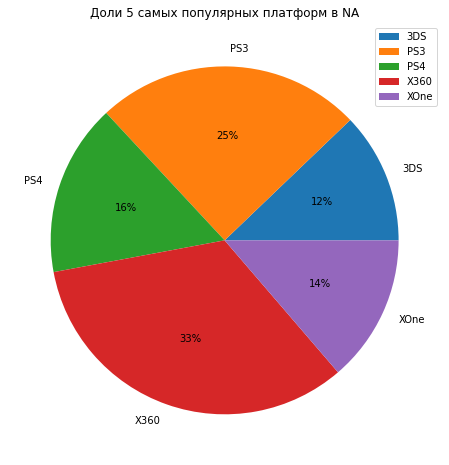

In [58]:
na_df_plat.pivot_table(index = 'platform', values = 'na_sales', aggfunc = 'sum').plot(kind='pie', subplots=True, figsize=(8, 8), autopct='%1.f%%')
plt.title("Доли 5 самых популярных платформ в NA")
plt.ylabel("")
plt.show()

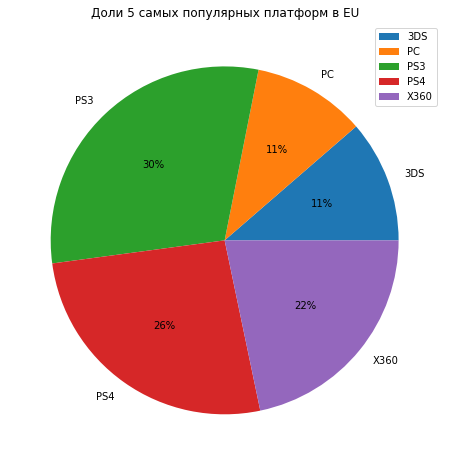

In [59]:
eu_df_plat.pivot_table(index = 'platform', values = 'eu_sales', aggfunc = 'sum').plot(kind='pie', subplots=True, figsize=(8, 8), autopct='%1.f%%')
plt.title("Доли 5 самых популярных платформ в EU")
plt.ylabel("")
plt.show()

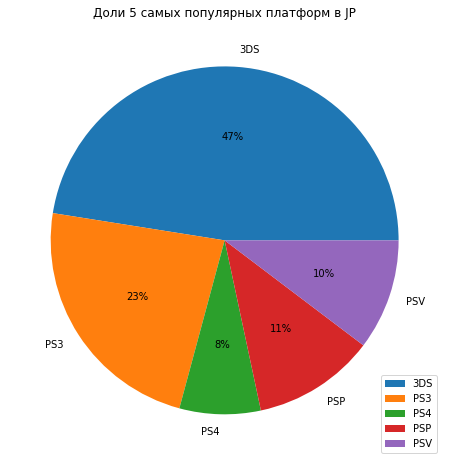

In [60]:
jp_df_plat.pivot_table(index = 'platform', values = 'jp_sales', aggfunc = 'sum').plot(kind='pie', subplots=True, figsize=(8, 8), autopct='%1.f%%')
plt.title("Доли 5 самых популярных платформ в JP")
plt.ylabel("")
plt.show()

Что касается популярности платформ, то мы видим, что в каждом регионе есть отличия по пристрастию к платформам. И если Европейски рынок в чем-то схож с Американским, то вот в Японии вообще все по-другому. Самой популярной платформы в Америке явялется X360, в Европе - PS3 а в Японии Львиную долю берет 3DS. Удивительно еще то, что в Японии любят пользоваться PSP. Ну и по цифрам мы видим, что рынок Америки приносит больше всего средвтв, значит можно сосредоточиться в этом направлении.

Теперь посмотрим  на самые популярные жанры в регионах


In [61]:
top_genre_na = act_df.pivot_table(index = 'genre', values = ['na_sales'], aggfunc = 'sum').sort_values(by = 'na_sales', ascending = False).reset_index()
top_genre_eu = act_df.pivot_table(index = 'genre', values = ['eu_sales'], aggfunc = 'sum').sort_values(by = 'eu_sales', ascending = False).reset_index()
top_genre_jp = act_df.pivot_table(index = 'genre', values = ['jp_sales'], aggfunc = 'sum').sort_values(by = 'jp_sales', ascending = False).reset_index()

Теперь посмотрим на цифрах

In [62]:
top_genre_na.head(5)

,genre,na_sales
0,Action,230.92
1,Shooter,194.43
2,Sports,108.70
3,Role-Playing,83.78
4,Misc,69.69


In [63]:
top_genre_eu.head(5)

,genre,eu_sales
0,Action,199.12
1,Shooter,148.02
2,Sports,88.48
3,Role-Playing,62.30
4,Racing,40.58


In [64]:
top_genre_jp.head(5)

,genre,jp_sales
0,Role-Playing,79.87
1,Action,63.62
2,Misc,17.60
3,Fighting,12.38
4,Platform,12.13


In [65]:
genre_na = top_genre_na.head(5)
genre_eu = top_genre_eu.head(5)
genre_jp = top_genre_jp.head(5)

Построим круговую диаграмму с долями каждой топовой платформы для каждого региона отдельно.

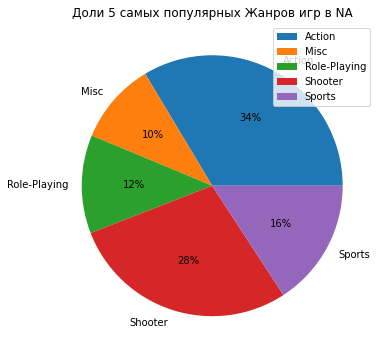

In [66]:
genre_na.pivot_table(index = 'genre', values = 'na_sales', aggfunc = 'sum').plot(kind='pie', subplots=True, figsize=(6, 6), autopct='%1.f%%')
plt.title("Доли 5 самых популярных Жанров игр в NA")
plt.ylabel("")
plt.show()

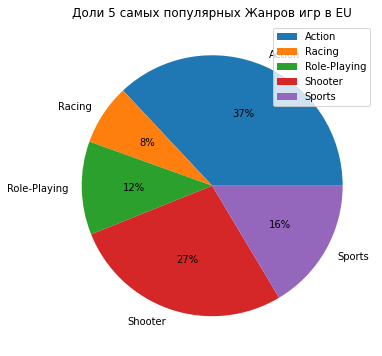

In [67]:
genre_eu.pivot_table(index = 'genre', values = 'eu_sales', aggfunc = 'sum').plot(kind='pie', subplots=True, figsize=(6, 6), autopct='%1.f%%')
plt.title("Доли 5 самых популярных Жанров игр в EU")
plt.ylabel("")
plt.show()

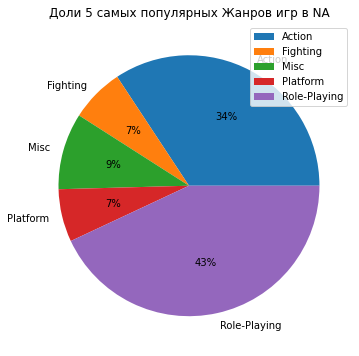

In [68]:
genre_jp.pivot_table(index = 'genre', values = 'jp_sales', aggfunc = 'sum').plot(kind='pie', subplots=True, figsize=(6, 6), autopct='%1.f%%')
plt.title("Доли 5 самых популярных Жанров игр в NA")
plt.ylabel("")
plt.show()

Что касается самых популярных жанров, тот тут мы наблюдаем схожесть запросов пользователей Европы и США. У них даже процентное соотношение почти одинаковое. Здесь Японский потребитель снова отличился своей любовью к Ролевым игрушкам. Как мы вновь можем убедиться - рынок США самый прибыльный.

Посмотрим какое влияние оказазывает рейтинг на продажи в различных регионах.

In [69]:
act_df.pivot_table(index = 'rating', values = ['na_sales', 'eu_sales', 'jp_sales'], aggfunc = 'sum')

,eu_sales,jp_sales,na_sales
rating,,,
0,116.61,138.21,123.69
E,141.73,36.68,170.17
E10+,78.00,11.23,117.72
EC,0.00,0.00,0.42
M,250.26,26.14,308.45
RP,0.03,0.00,0.00
T,83.16,33.39,109.31


Честно говоря, не сказал бы, что рейтинг оказывает какое-то существенное влияние на продажи. Как правило, игры или везде продаются пропорционально друг другу, или не продатся вообще. Самые обсуждаемые игры жанра E(для всех возрастов).

### Вывод: 
Мы проанализировали различные регионы по пристрастиям к платформам и жанрам. Самым прибыльным является рынок Северной Америки. По своему поведению он чем-то похож на Европейский. Япония же имеет свои порядки и законы в мире видеоигр. У них есть собственная изюминка как при использовании разных платформ, так и при выборе жанров игр. Если сделать вывод о самом топовом жанре во всех регионах, то везде любят Action. По платформам сложно выбрать общий номер один, так как сказываются региональные особенности.

Как мне кажется рынок NA и EU - больше сосредоточен на массовую аудиторию, а вот JP это уже что-то спецэфичное. 

## Шаг №4. Проверка гипотез

Попробуем сравнить пользовательские рейтинги платформ Xbox One и PC.


Сформируем гипотезы для проверки равенства пользовательских рейтингов платформ Xbox One и PC при помощи метода st.ttest_ind(): - поскольку выборки у нас будут приниматься разные. 


####  Нулевая гипотеза - Рейтинги равны. 
#### Альтернативная гипотеза - Рейтинги различаются.

Подготовим необходимые данные для проверки Гипотезы

In [70]:
xbox_one = act_df.query('platform == "XOne"')
pc = act_df.query('platform == "PC"')

xbox_one = xbox_one[xbox_one['user_score'] != 0]
pc =  pc[pc['user_score'] != 0]

xbox_one_1 = xbox_one['user_score'].astype(float)
pc_1 = pc['user_score'].astype(float)

In [71]:
alpha = .05

results = st.ttest_ind(
    xbox_one_1, 
    pc_1)

print('p-значение по платформам: ', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу о равенстве")
else:
    print("Не получилось отвергнуть нулевую гипотезу о равенстве")

p-значение по платформам:  0.6267602271422398
Не получилось отвергнуть нулевую гипотезу о равенстве


Итоговое значение p-value говорит о том, что средние пользовательские рейтинги на платформах XOne и PC примерно одинаковый. Можем сделать вывод, что нулевую гипотезу не получилось отвергнуть.

Сформируем гипотезу для проверки различаются ли рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные. при помощи метода st.ttest_ind(): - поскольку выборки у нас будут приниматься разные.

####  Нулевая гипотеза - Рейтинги равны.
####  Альтернативная гипотеза - Рейтинги различаются.

Подготовим необходимые данные для проверки второй Гипотезы

In [72]:
action = act_df.query('genre == "Action"')
sports = act_df.query('genre == "Sports"')

action  = action[action['user_score'] != 0]
sports =  sports[sports['user_score'] != 0]

action_1 = action['user_score'].astype(float)
sports_1 = sports['user_score'].astype(float)

Проверим Гипотезу

In [73]:
alpha = .05

results = st.ttest_ind(
    action_1, 
    sports_1)

print('p-значение по жанрам: ', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу о равенстве")
else:
    print("Не получилось отвергнуть нулевую гипотезу о равенстве")

p-значение по жанрам:  5.1974550252152054e-24
Отвергаем нулевую гипотезу о равенстве


Итоговое значение p-value говорит о том, что разница в рейтингах пользователей по Жанрам сильно отличается. По этой причине мы отвергаем нулевую гипотезу.

## Шаг №5. Итоговый вывод: 

В ходе анализа удалось сформировать замерности определяющие успешность игры. Как правило, во всех регионах очень любят Action и Sports эти жанры являются самыми раскупаемыми. В последнее время наблюдается тенденция роста у жанра Shooter, так что на него тоже можно сделать ставку. Есть еще уникальная особенность - если хотите иметь успех в Японии, то здесь также зайдет жанр Role_playing. Поскольку сейчас наблюдается падение прибыли игр из года в год, то следовало бы смотреть на самые популярные жанры и рассчитывать только на них. Можно попытаться соригинальничать и сделать ставку на какой-то непопулярный жанр, но скорее всего, не получится получить дополнительные продажи.

Самые обсуждаемые и продаваемые игры категорий E(для всех возрастов), M(со сценами насилия) и игры на подростковую аудиторию(T).
По платформам ситуация интересная - средний цикл жизни платформы составляет 10 лет. После этого появляется либо абсолютно новый игрок на рынке, либо младший брат сменяет старшего(пример PS и PS2). Региональные пристрастия  к платформам немного отлчаются. В Северной Америке любят больше всего играть на X360, в Европе PS3, а в Японии на 3DS. Рейтинг пользователей, можно сказать, не влияет на продажи. Даже если пользователи ставят низкие оценки - это не значит, что игра будет плохо продаваться. Чуть иначе обстоят дела при оценке критиков. Как правильно их оценки уже коррелируются с продажами игр. Все же, я считаю, что на мнения критиков стоит ориентироваться, в отличие от пользователей.

Резюмируем:
Я бы все же делал ставку на рекламу игр в жанре Экшн, Спорт и Шутер. Рассчитывая на Аудиторию Северной Америки и Европы. Платформы для продажи X360, PS3 хоть уже на рынке достаточно давно и продажи с них падают, но на 2017 год их хватит + я бы рекламировался на те платформы, которые в 2016 продавались лучше всего - PS4 и XOne.


